In [1]:
import random
import itertools
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2025, 2, 24)

tickers = ['AAPL','MSFT','F','BAC','NKE','V','DIS']

n_tickers_selected = 4
n_combinations = 20

sampled_combinations = random.sample(list(itertools.combinations(tickers, n_tickers_selected)), n_combinations)

In [3]:
all_portfolios = []
rf = 0.0415

for combination in sampled_combinations:
    data = yf.download(list(combination), start= start_date, end = end_date, progress= False)["Close"]
    returns = data.pct_change().dropna()
    covariance_matrix = returns.cov()

    annual_returns = returns.mean() * 252
    annual_cov = covariance_matrix * 252

    # Numero de simulaciones de ponderaciones
    num_portafolios = 10000

    weights_array = np.zeros((num_portafolios, n_tickers_selected))
    returns_array = np.zeros(num_portafolios)
    risk_array = np.zeros(num_portafolios)
    sharpe_array = np.zeros(num_portafolios)

    for i in range(num_portafolios):
        # generas los pesos aleatorios para cada portafolio
        weights = np.random.random(n_tickers_selected)
        weights = weights / np.sum(weights)

        # obteniendo rendimiento y volatilidad esperada anual por portafolio
        portfolio_return = np.dot(annual_returns, weights)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

        # guardando historicos
        weights_array[i, :] = weights
        returns_array[i] = portfolio_return
        risk_array[i] = portfolio_risk
        sharpe_array[i] = (portfolio_return - rf) / portfolio_risk

    portfolios = pd.DataFrame({
        "Returns": returns_array,
        "Risk": risk_array,
        "Sharpe": sharpe_array
    })

    for i, symbol in enumerate(combination):
        portfolios[symbol + " Weight"] = weights_array[:, i]

    all_portfolios.append(portfolios)

YF.download() has changed argument auto_adjust default to True


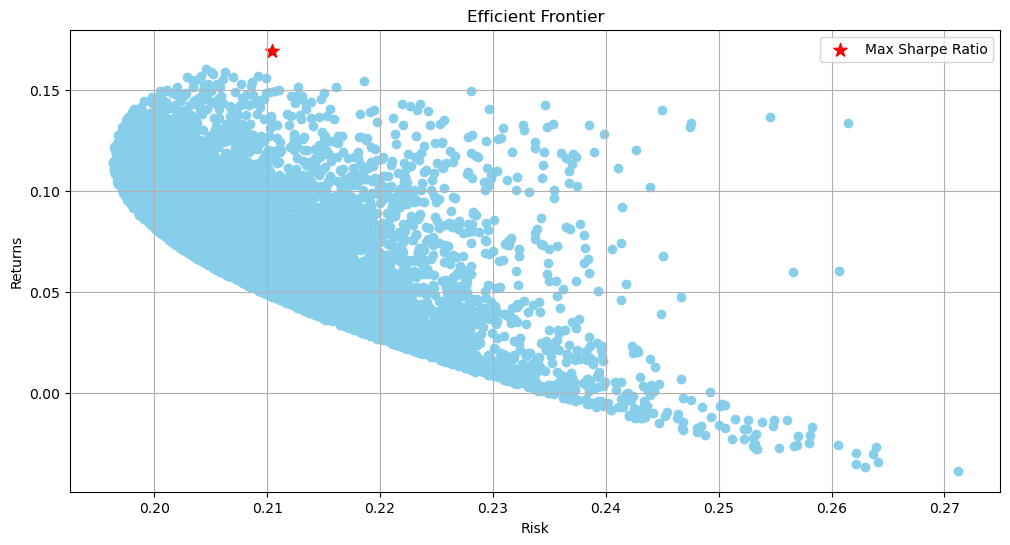

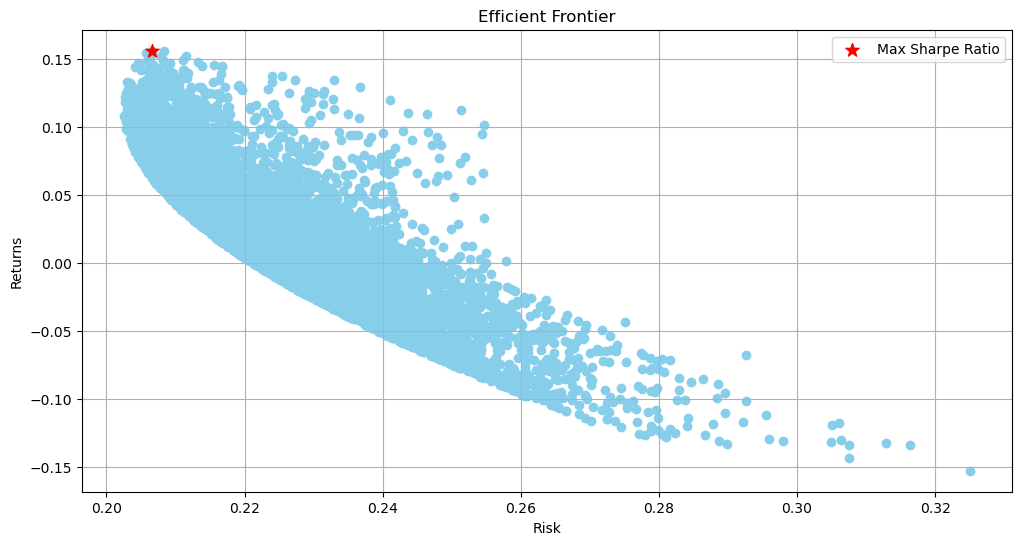

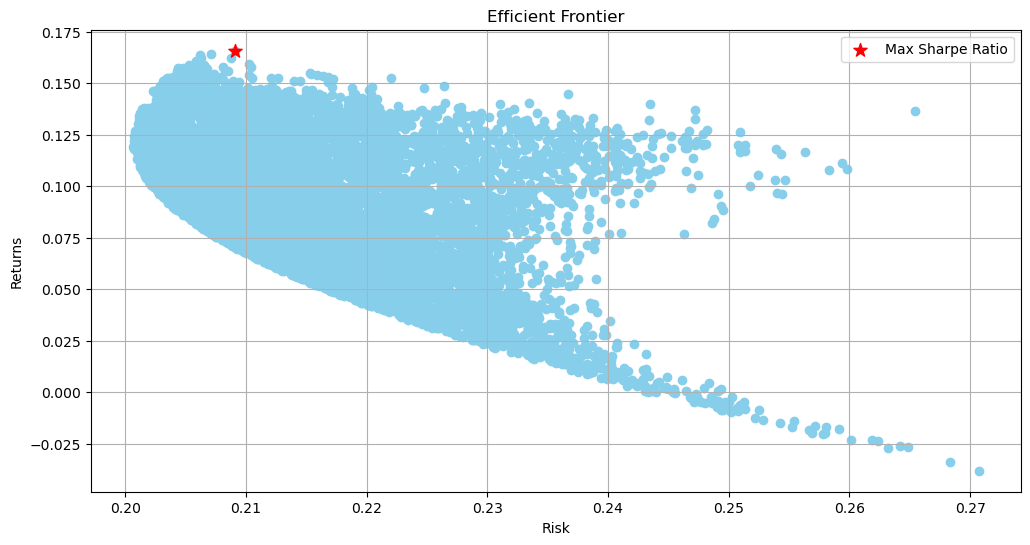

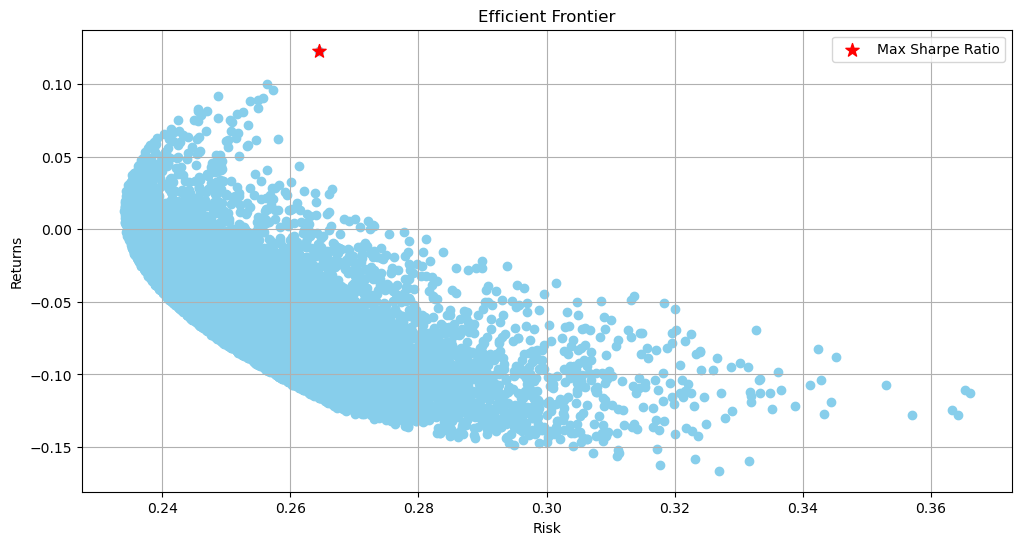

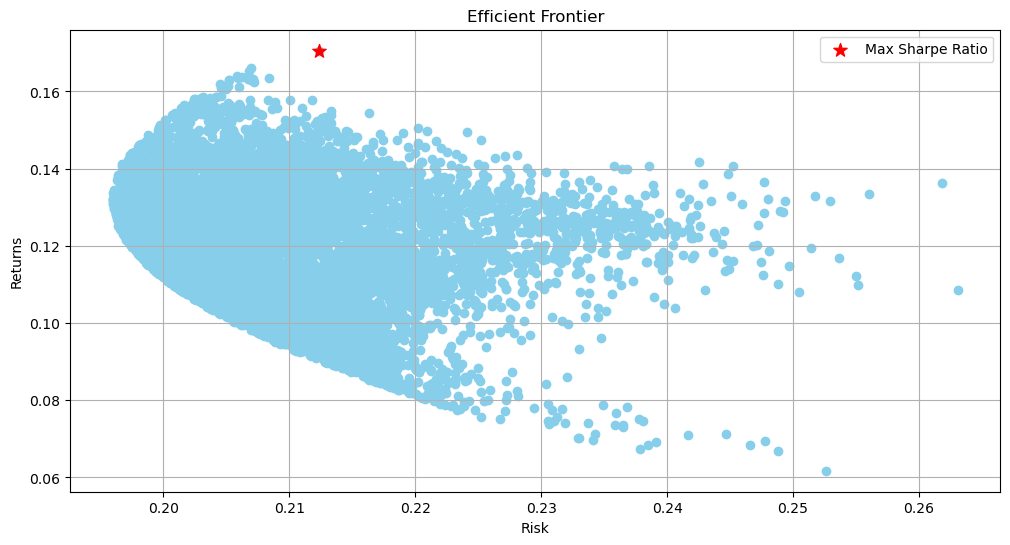

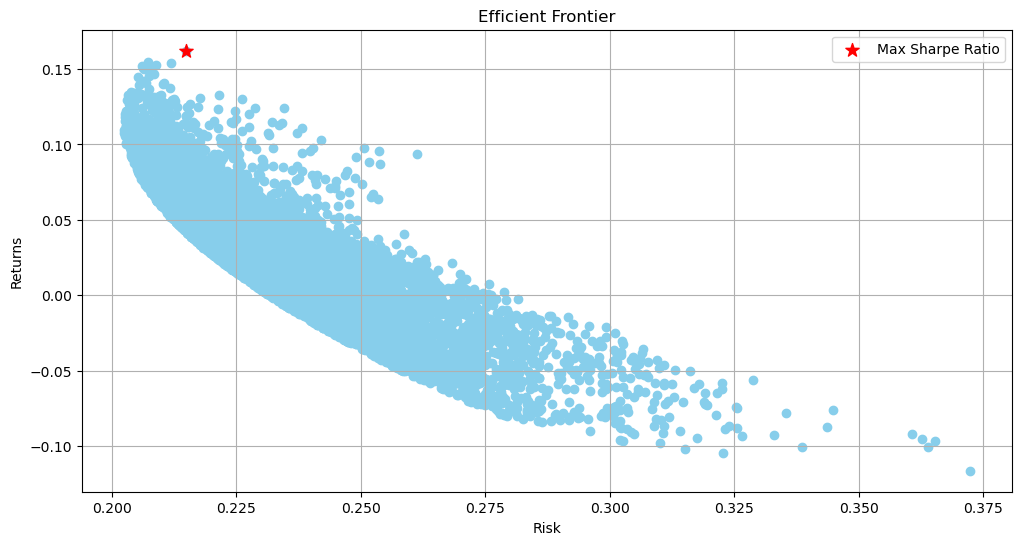

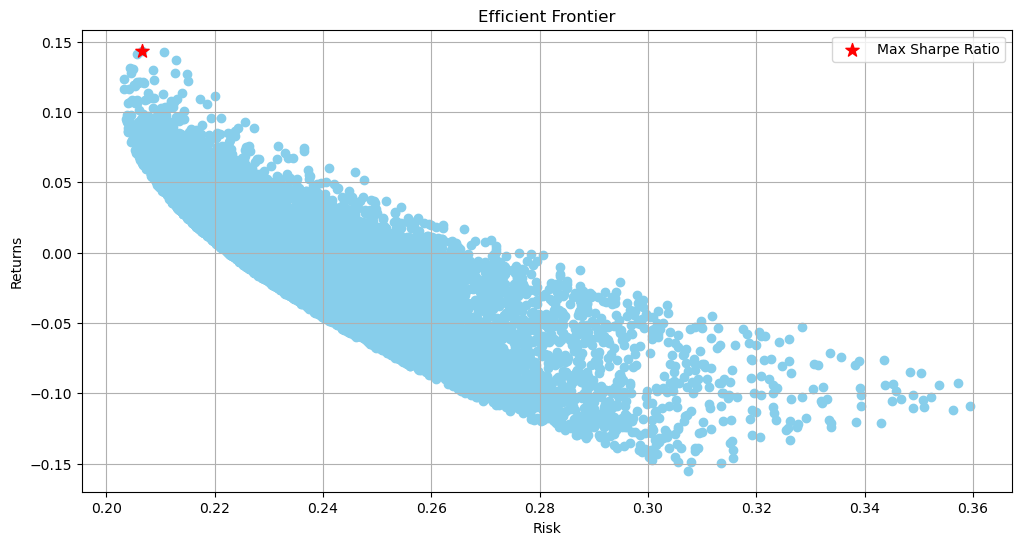

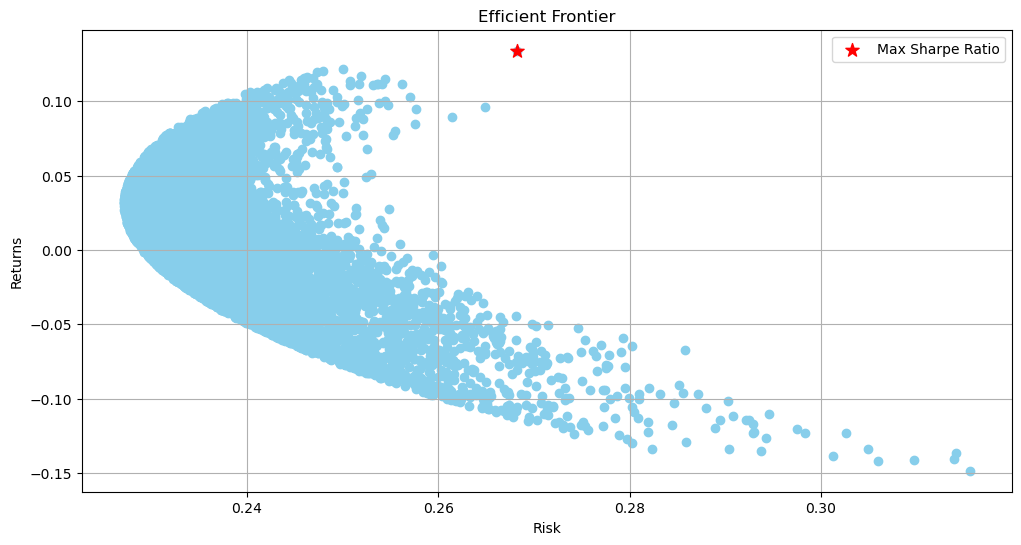

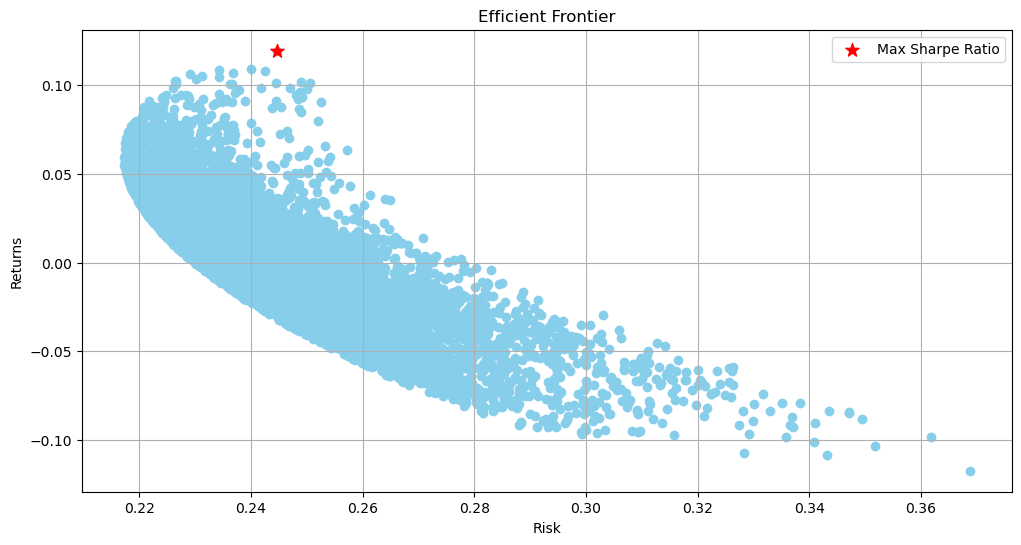

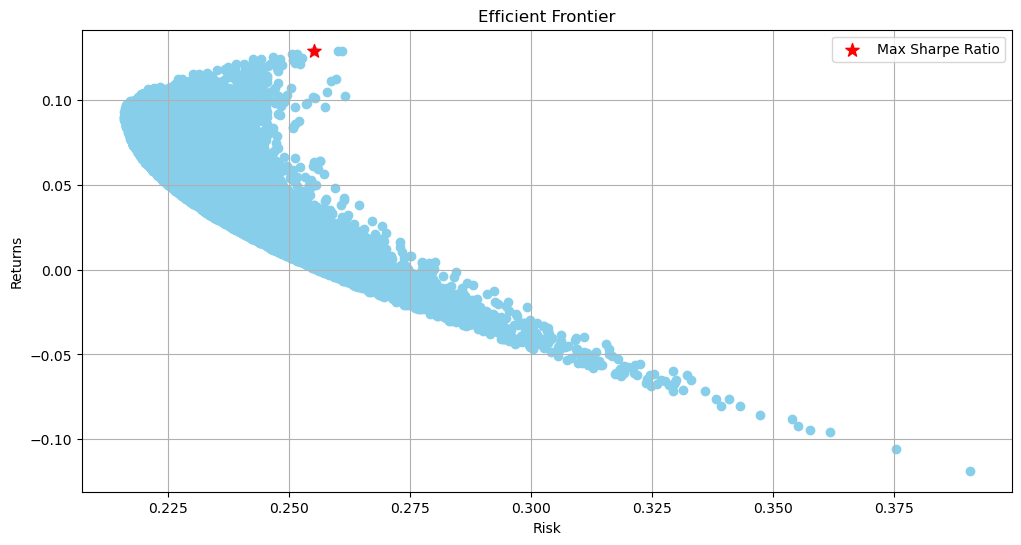

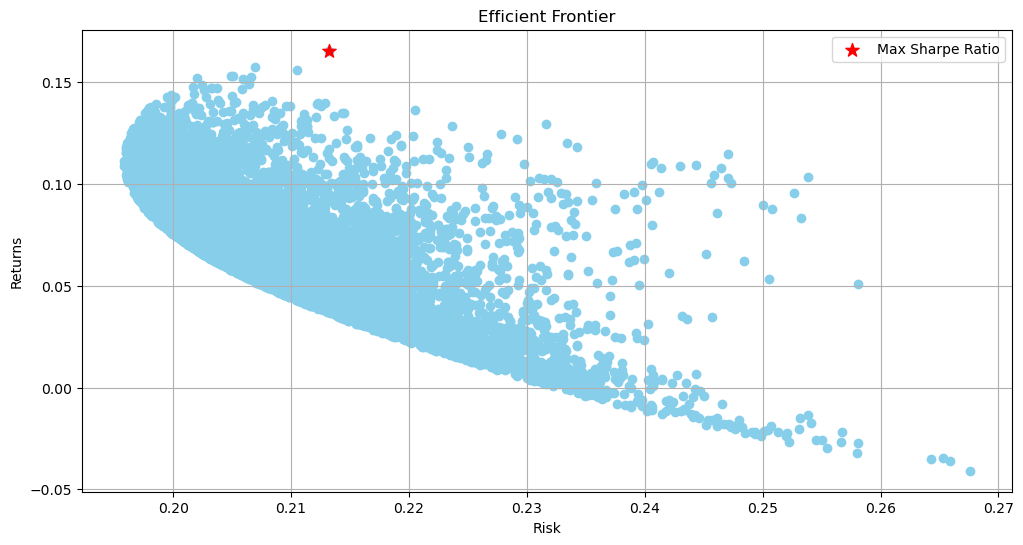

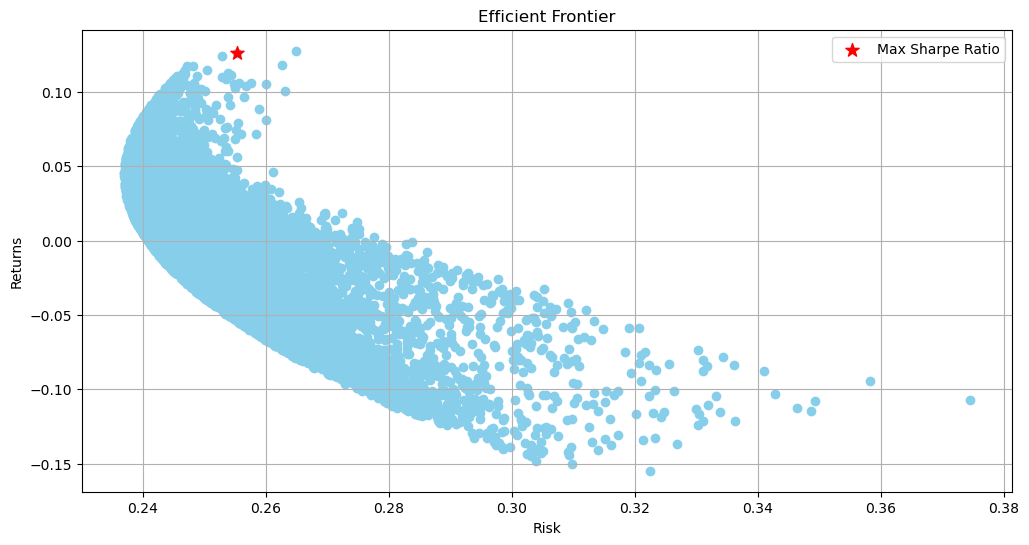

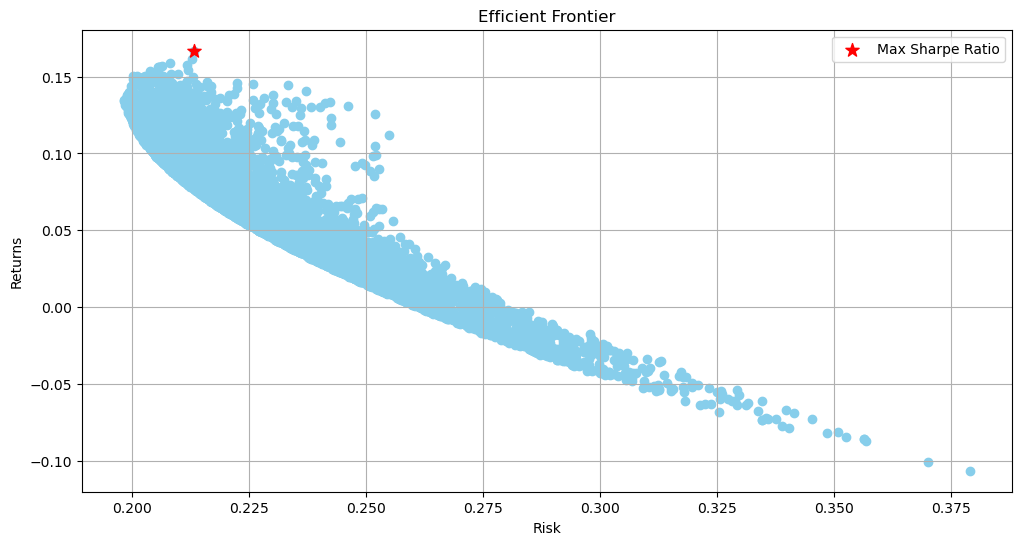

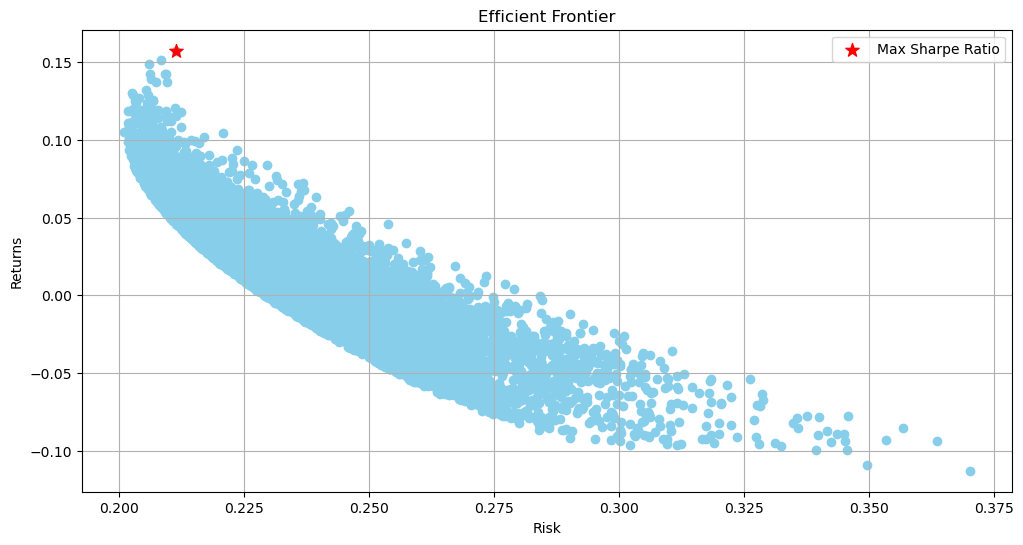

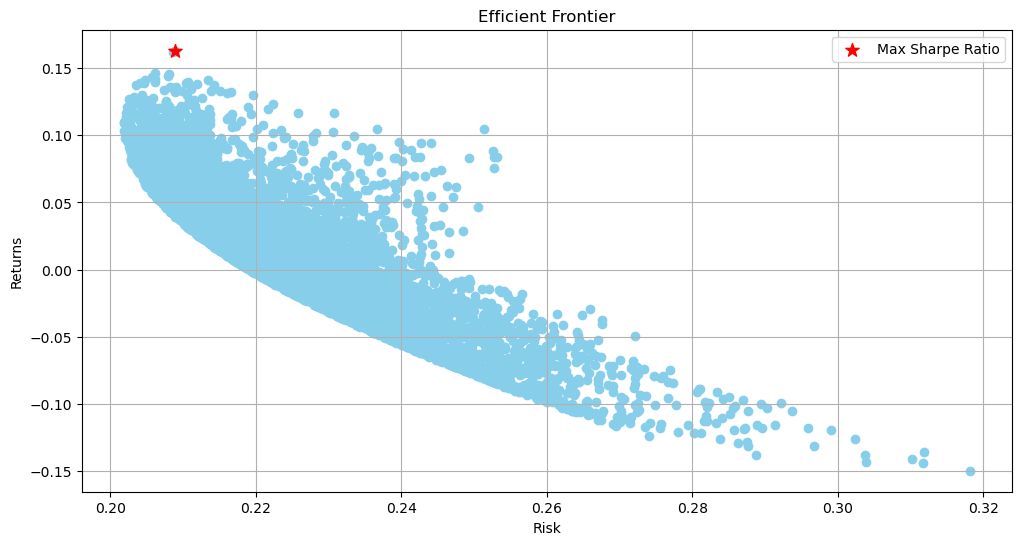

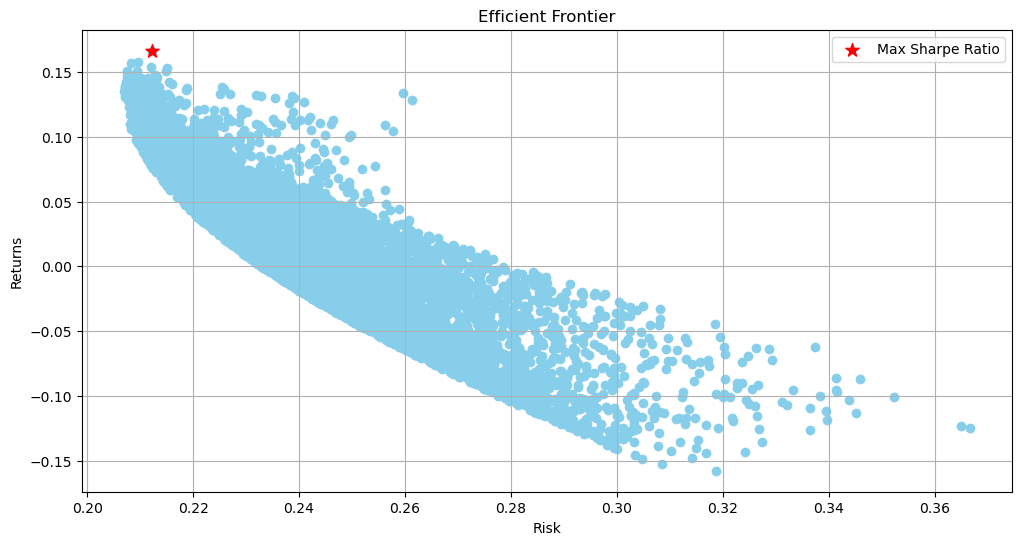

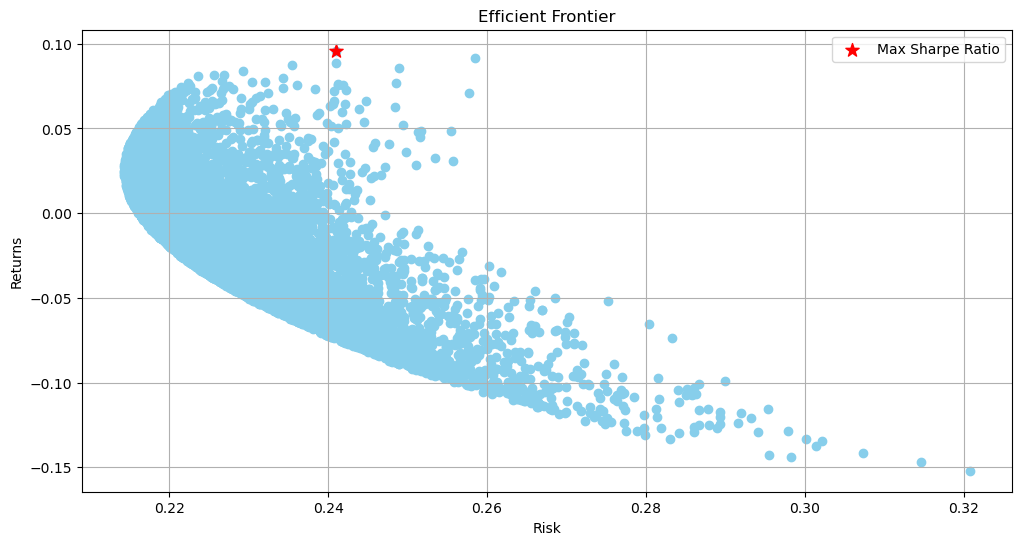

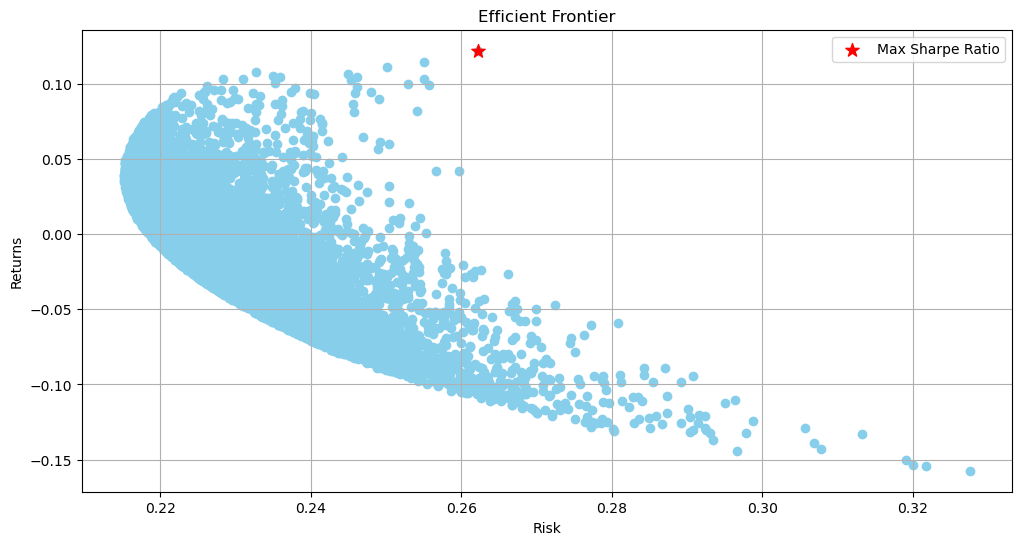

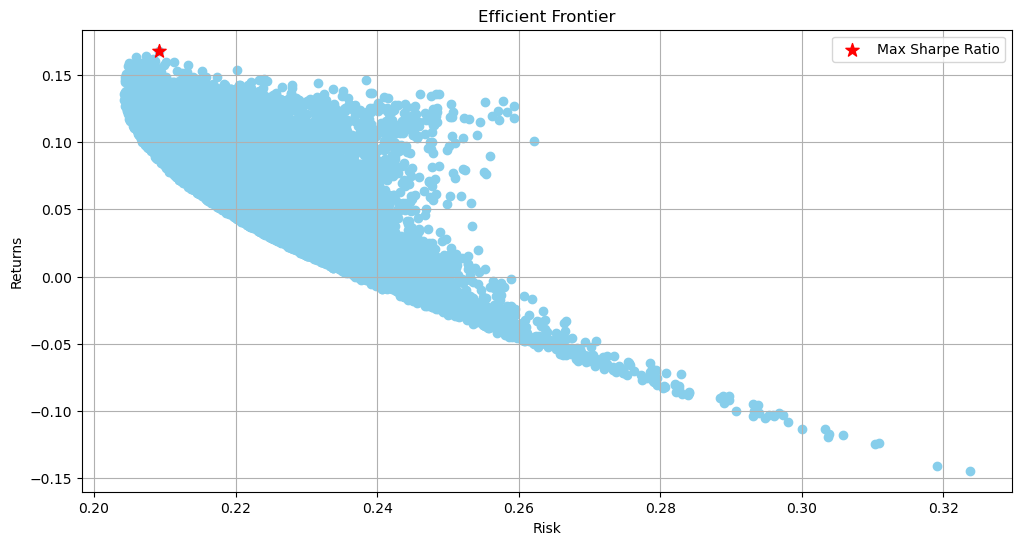

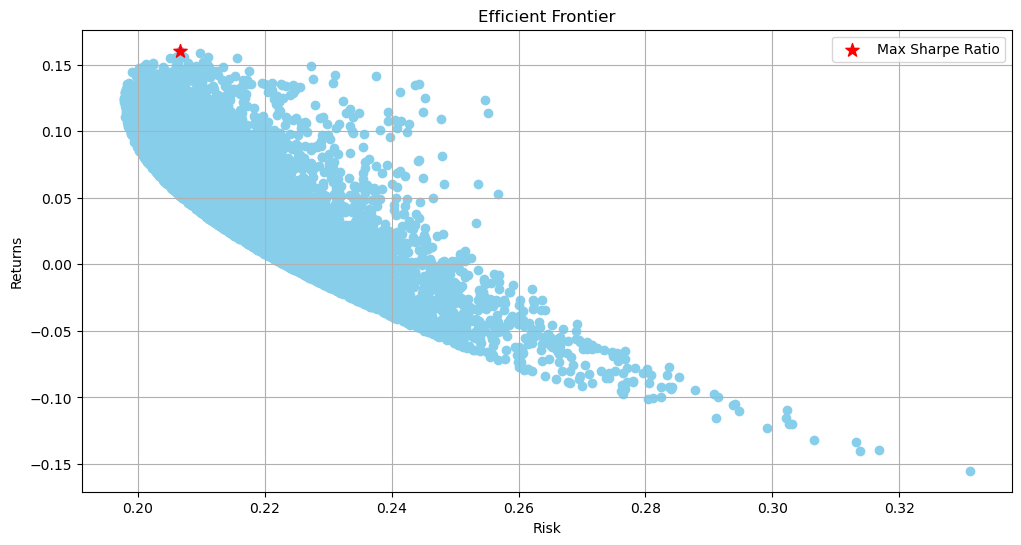

In [4]:
for i in range(n_combinations):
    plt.figure(figsize=(12,6))
    plt.scatter(all_portfolios[i]['Risk'], all_portfolios[i]['Returns'], c = 'skyblue')

    max_sharpe_idx = all_portfolios[i]['Sharpe'].idxmax()
    max_sharpe = all_portfolios[i].loc[max_sharpe_idx]
    plt.scatter(max_sharpe['Risk'], max_sharpe['Returns'], c='red', s=100, marker='*', label='Max Sharpe Ratio')

    plt.xlabel('Risk')
    plt.ylabel('Returns')
    plt.title('Efficient Frontier')
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
for i in range(n_combinations):
    top_10 = all_portfolios[i].sort_values(by='Sharpe', ascending=False).head(10)
    display(top_10)


,Returns,Risk,Sharpe,AAPL Weight,BAC Weight,V Weight,DIS Weight
5941,0.169568,0.210464,0.608504,0.102723,0.027141,0.001488,0.868648
1073,0.160657,0.204617,0.582344,0.218254,0.052987,0.006264,0.722495
3827,0.158958,0.205021,0.572906,0.263251,0.033168,0.016081,0.687500
3154,0.158852,0.206260,0.568950,0.150395,0.024544,0.038767,0.786293
5186,0.158119,0.205208,0.568297,0.300886,0.035425,0.012378,0.651311
1625,0.156561,0.202935,0.566983,0.146716,0.109175,0.005758,0.738352
5563,0.156821,0.204117,0.564978,0.270690,0.046655,0.016741,0.665914
9897,0.155192,0.203301,0.559230,0.293939,0.070882,0.007393,0.627786
9450,0.155201,0.203678,0.558237,0.277125,0.051724,0.019733,0.651417
7258,0.156588,0.206941,0.556136,0.334800,0.004291,0.029004,0.631905


,Returns,Risk,Sharpe,AAPL Weight,NKE Weight,V Weight,DIS Weight
3645,0.155823,0.206618,0.553306,0.189465,0.039666,0.012419,0.758451
2822,0.155784,0.208335,0.548558,0.364921,0.015847,0.009725,0.609507
190,0.154309,0.205761,0.548252,0.273596,0.046793,0.002348,0.677263
6596,0.154306,0.205976,0.547664,0.291983,0.044137,0.002176,0.661704
5937,0.152136,0.207905,0.532145,0.135236,0.032313,0.034173,0.798278
3065,0.150243,0.206304,0.527101,0.330714,0.046476,0.007819,0.614990
2329,0.152067,0.211577,0.522587,0.451757,0.017507,0.009494,0.521242
1521,0.148048,0.205928,0.517405,0.218928,0.033692,0.035550,0.711830
6696,0.148757,0.208214,0.515128,0.120654,0.030384,0.046810,0.802152
2749,0.146601,0.204603,0.513681,0.271973,0.074394,0.005135,0.648499


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,V Weight,DIS Weight
415,0.165698,0.209121,0.593904,0.028466,0.007789,0.127216,0.836528
2639,0.164269,0.207131,0.592712,0.080746,0.005699,0.125790,0.787765
3720,0.163502,0.206204,0.591658,0.218314,0.002817,0.068243,0.710627
8668,0.162022,0.206284,0.584252,0.253193,0.008586,0.048999,0.689222
9300,0.160794,0.205891,0.579406,0.242270,0.014794,0.050850,0.692086
7496,0.162189,0.208735,0.578194,0.079175,0.036973,0.043575,0.840277
7997,0.159551,0.205857,0.573463,0.270498,0.010204,0.069655,0.649644
4505,0.158702,0.205262,0.570989,0.237904,0.020096,0.064995,0.677006
2832,0.158535,0.206536,0.566654,0.309753,0.011879,0.055938,0.622430
5396,0.157452,0.204773,0.566247,0.182670,0.031696,0.073121,0.712513


,Returns,Risk,Sharpe,AAPL Weight,F Weight,NKE Weight,DIS Weight
1364,0.122866,0.264508,0.307613,0.941883,0.022634,0.006250,0.029232
2251,0.099937,0.256386,0.227924,0.848624,0.036107,0.108929,0.006340
2136,0.095709,0.257228,0.210744,0.853329,0.007423,0.049298,0.089950
7044,0.091743,0.248653,0.202060,0.796997,0.136267,0.053336,0.013400
8658,0.090187,0.255717,0.190396,0.825338,0.008410,0.116967,0.049286
3270,0.088734,0.254901,0.185305,0.825148,0.012585,0.076825,0.085441
1953,0.087977,0.253711,0.183187,0.809928,0.031799,0.120362,0.037911
9560,0.082489,0.245659,0.166853,0.761920,0.154343,0.048479,0.035259
8252,0.083433,0.254896,0.164510,0.790640,0.023185,0.171948,0.014227
8811,0.081657,0.247026,0.162560,0.769815,0.116344,0.062861,0.050979


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,BAC Weight,V Weight
3627,0.170563,0.212332,0.607838,0.014359,0.010537,0.072333,0.902771
6282,0.166127,0.206988,0.602097,0.143669,0.011020,0.062424,0.782887
8566,0.165210,0.206831,0.598122,0.099128,0.033197,0.060757,0.806918
5152,0.164075,0.205818,0.595550,0.129359,0.036140,0.054665,0.779836
1844,0.163881,0.206285,0.593261,0.075116,0.031516,0.097367,0.796001
6034,0.163042,0.205251,0.592163,0.120118,0.040076,0.068006,0.771799
9106,0.163434,0.205956,0.592038,0.105470,0.058953,0.035823,0.799754
8757,0.162912,0.205232,0.591582,0.194183,0.018573,0.066879,0.720364
1943,0.163228,0.206701,0.588909,0.034523,0.034885,0.124224,0.806367
4603,0.161819,0.204535,0.588255,0.130009,0.033115,0.093232,0.743645


,Returns,Risk,Sharpe,MSFT Weight,F Weight,V Weight,DIS Weight
1932,0.162133,0.214936,0.561254,0.013276,0.033183,0.026976,0.926564
2761,0.154717,0.207279,0.546207,0.000078,0.014407,0.269221,0.716294
5125,0.152102,0.206125,0.536580,0.028698,0.010372,0.221840,0.739090
8626,0.152755,0.208967,0.532405,0.015806,0.039401,0.128436,0.816357
8415,0.153753,0.211946,0.529629,0.027347,0.043321,0.054020,0.875311
6493,0.150624,0.206355,0.528814,0.016954,0.019728,0.244350,0.718968
2443,0.149792,0.206546,0.524302,0.017545,0.008913,0.303177,0.670365
9623,0.150027,0.207318,0.523483,0.082451,0.001065,0.098709,0.817775
7151,0.144989,0.205176,0.504393,0.043559,0.021385,0.223326,0.711730
2799,0.146478,0.208470,0.503566,0.009578,0.060462,0.149110,0.780850


,Returns,Risk,Sharpe,F Weight,BAC Weight,NKE Weight,V Weight
8259,0.143643,0.206651,0.494277,0.163686,0.018536,0.021755,0.796024
9444,0.141544,0.205642,0.486495,0.181295,0.002647,0.035294,0.780764
9496,0.142651,0.210698,0.480074,0.076452,0.050964,0.027486,0.845098
5818,0.136700,0.212862,0.447240,0.026530,0.042575,0.069588,0.861307
8377,0.131515,0.204348,0.440497,0.304055,0.011971,0.012060,0.671914
4932,0.130407,0.204845,0.434020,0.329372,0.014489,0.004006,0.652133
9543,0.129982,0.208627,0.424114,0.125051,0.077378,0.023374,0.774196
5897,0.128050,0.204606,0.423006,0.209211,0.029028,0.040944,0.720817
9288,0.123794,0.203345,0.404701,0.289524,0.005508,0.044923,0.660045
4194,0.127520,0.212730,0.404361,0.055986,0.108644,0.027837,0.807532


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,NKE Weight,DIS Weight
8329,0.134014,0.268234,0.344899,0.967826,0.004279,0.018658,0.009236
5645,0.121520,0.250006,0.320071,0.440437,0.001554,0.556231,0.001778
4844,0.120670,0.247894,0.319369,0.512036,0.012815,0.470230,0.004919
8538,0.119897,0.247308,0.317004,0.609670,0.026152,0.355070,0.009107
8526,0.116602,0.246218,0.305020,0.487650,0.026290,0.477729,0.008331
3031,0.115707,0.246250,0.301349,0.508335,0.017706,0.454935,0.019024
4718,0.115461,0.245925,0.300746,0.532113,0.021042,0.426650,0.020194
335,0.115653,0.246855,0.300391,0.452902,0.018984,0.515322,0.012792
7458,0.116956,0.251880,0.299570,0.804317,0.087109,0.107890,0.000684
825,0.114342,0.244399,0.298046,0.489485,0.049531,0.459167,0.001817


,Returns,Risk,Sharpe,AAPL Weight,F Weight,BAC Weight,DIS Weight
3709,0.119410,0.244590,0.318535,0.818654,0.159359,0.010508,0.011479
5963,0.108377,0.234236,0.285512,0.729044,0.218713,0.046410,0.005833
1857,0.106343,0.229018,0.283135,0.663505,0.315303,0.012224,0.008968
862,0.109117,0.239902,0.281852,0.769721,0.170322,0.022983,0.036974
2047,0.106637,0.236844,0.275021,0.738951,0.205561,0.011937,0.043550
3412,0.104900,0.231201,0.274222,0.695750,0.249257,0.044236,0.010757
5914,0.107858,0.242412,0.273741,0.781175,0.150917,0.009018,0.058889
6529,0.103437,0.230091,0.269185,0.669098,0.292152,0.008252,0.030498
1917,0.104469,0.234324,0.268725,0.721223,0.211038,0.038619,0.029120
353,0.102150,0.226292,0.268015,0.615644,0.364108,0.007811,0.012437


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,F Weight,BAC Weight
1853,0.129133,0.255192,0.343400,0.885595,0.081472,0.005243,0.027690
8288,0.127263,0.250752,0.342022,0.636137,0.000490,0.002562,0.360811
5410,0.125597,0.246813,0.340732,0.718794,0.056244,0.006118,0.218845
2001,0.124008,0.242565,0.340146,0.686895,0.086699,0.001623,0.224783
8645,0.127050,0.251652,0.339954,0.735282,0.015748,0.011750,0.237220
7557,0.124132,0.244258,0.338300,0.615069,0.048507,0.001641,0.334783
4491,0.128846,0.260211,0.335675,0.876429,0.007506,0.023204,0.092862
2466,0.123251,0.244014,0.335026,0.751484,0.104726,0.008265,0.135525
1717,0.128918,0.261021,0.334906,0.922979,0.039823,0.020723,0.016474
9971,0.124139,0.248116,0.333068,0.779343,0.072699,0.015611,0.132347


,Returns,Risk,Sharpe,MSFT Weight,BAC Weight,V Weight,DIS Weight
2302,0.165340,0.213246,0.580739,0.001137,0.036553,0.042099,0.920211
1728,0.157209,0.206913,0.559219,0.000720,0.012745,0.249783,0.736752
1919,0.151810,0.202049,0.545955,0.095666,0.001786,0.194302,0.708246
2849,0.153109,0.205057,0.544282,0.027846,0.008870,0.274462,0.688822
3245,0.152698,0.204931,0.542612,0.021236,0.021069,0.248315,0.709380
9987,0.155678,0.210529,0.542337,0.016192,0.071394,0.030331,0.882082
2705,0.152573,0.206583,0.537668,0.041986,0.058400,0.075950,0.823664
5585,0.151629,0.205911,0.534839,0.184764,0.008354,0.008624,0.798258
5960,0.148360,0.202403,0.527957,0.118338,0.030935,0.097333,0.753395
3122,0.147654,0.201696,0.526307,0.079317,0.030945,0.179754,0.709983


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,F Weight,NKE Weight
5333,0.126170,0.255399,0.331522,0.784569,0.004963,0.193477,0.016991
6508,0.123855,0.252972,0.325552,0.744239,0.023377,0.226726,0.005658
7602,0.127694,0.264872,0.325417,0.933337,0.027282,0.031435,0.007946
1547,0.117487,0.247281,0.307291,0.550732,0.026717,0.416745,0.005806
7173,0.117336,0.248188,0.305558,0.623625,0.011069,0.338453,0.026853
7780,0.114648,0.246809,0.296377,0.513724,0.008229,0.450430,0.027618
7431,0.118375,0.262735,0.292596,0.913455,0.026396,0.020472,0.039676
9608,0.114741,0.250442,0.292448,0.720490,0.036396,0.218504,0.024610
6739,0.113622,0.246715,0.292330,0.495996,0.005016,0.466837,0.032152
9087,0.112428,0.246618,0.287604,0.472664,0.005981,0.488149,0.033206


,Returns,Risk,Sharpe,AAPL Weight,F Weight,BAC Weight,V Weight
1261,0.166796,0.213273,0.587494,0.038015,0.031377,0.016863,0.913745
9985,0.158830,0.208047,0.563960,0.384417,0.026178,0.000761,0.588644
1582,0.161368,0.212733,0.563465,0.052518,0.020097,0.037458,0.889927
8417,0.156416,0.205752,0.558516,0.325585,0.039688,0.010692,0.624034
2614,0.156269,0.205590,0.558242,0.356331,0.054855,0.001016,0.587799
8735,0.156299,0.205701,0.558086,0.091981,0.098277,0.017000,0.792742
876,0.156562,0.206414,0.557434,0.356900,0.039870,0.006122,0.597108
1340,0.153912,0.203836,0.551484,0.204871,0.069631,0.022111,0.703387
5429,0.157737,0.211803,0.548799,0.449739,0.006074,0.004220,0.539968
7573,0.150563,0.200962,0.542704,0.207217,0.128381,0.008729,0.655674


,Returns,Risk,Sharpe,F Weight,BAC Weight,V Weight,DIS Weight
531,0.157143,0.211339,0.547192,0.048380,0.049236,0.006651,0.895733
2377,0.150964,0.208246,0.525647,0.138029,0.006919,0.024419,0.830633
8808,0.148886,0.206026,0.521222,0.188698,0.012471,0.005985,0.792847
2479,0.141936,0.206118,0.487273,0.111229,0.070136,0.013929,0.804706
7711,0.142424,0.209343,0.482100,0.024636,0.118702,0.008543,0.848119
7853,0.142110,0.209055,0.481263,0.073823,0.047910,0.046664,0.831602
3334,0.139069,0.206254,0.473050,0.195967,0.003807,0.042253,0.757973
1049,0.137096,0.207268,0.461222,0.059235,0.108322,0.020253,0.812189
7152,0.137302,0.209537,0.457209,0.005019,0.157092,0.002358,0.835531
4048,0.131886,0.205281,0.440304,0.217048,0.015220,0.047971,0.719761


,Returns,Risk,Sharpe,MSFT Weight,NKE Weight,V Weight,DIS Weight
9204,0.162864,0.208848,0.581110,0.006279,0.170339,0.004002,0.819380
1283,0.161727,0.208550,0.576489,0.011605,0.168546,0.003849,0.815999
2206,0.146292,0.206179,0.508255,0.016455,0.297689,0.019583,0.666273
6783,0.145428,0.208082,0.499454,0.010957,0.372818,0.011403,0.604822
3054,0.143626,0.205736,0.496395,0.078972,0.126064,0.016377,0.778587
3,0.143846,0.207981,0.492093,0.021512,0.117769,0.057778,0.802940
859,0.141721,0.206127,0.486208,0.025068,0.325456,0.021218,0.628258
8841,0.140718,0.204817,0.484423,0.058812,0.303779,0.004530,0.632879
1457,0.139836,0.206190,0.476918,0.006345,0.210200,0.062047,0.721408
7996,0.139112,0.204686,0.476889,0.058081,0.301602,0.010052,0.630265


,Returns,Risk,Sharpe,AAPL Weight,F Weight,NKE Weight,V Weight
148,0.166458,0.212303,0.588582,0.095946,0.017413,0.005219,0.881422
9053,0.157654,0.209639,0.554066,0.386098,0.012681,0.002138,0.599083
9026,0.156817,0.208200,0.553874,0.330068,0.004934,0.017517,0.647481
206,0.153729,0.212130,0.529060,0.450226,0.004643,0.013194,0.531938
3643,0.150827,0.207493,0.526894,0.220888,0.026680,0.027887,0.724544
1332,0.150251,0.207558,0.523956,0.217036,0.001139,0.052181,0.729645
671,0.150903,0.209361,0.522558,0.380567,0.028100,0.008630,0.582704
4217,0.152752,0.215024,0.517393,0.502588,0.012019,0.003732,0.481661
1540,0.150757,0.214781,0.508693,0.498356,0.014257,0.007955,0.479432
3476,0.146526,0.207446,0.506280,0.298859,0.030481,0.028175,0.642485


,Returns,Risk,Sharpe,MSFT Weight,BAC Weight,NKE Weight,DIS Weight
8621,0.095878,0.240953,0.225680,0.221766,0.001124,0.773781,0.003329
1352,0.088597,0.241015,0.195412,0.171516,0.045169,0.771887,0.011429
5828,0.091841,0.258431,0.194793,0.039910,0.048425,0.887131,0.024534
6775,0.087242,0.235428,0.194292,0.228472,0.036310,0.724920,0.010299
2756,0.083786,0.229253,0.184449,0.310311,0.009337,0.657324,0.023028
7945,0.085394,0.248877,0.176367,0.082589,0.072170,0.821539,0.023703
2600,0.081275,0.225612,0.176300,0.351269,0.031475,0.607636,0.009620
8720,0.081320,0.226892,0.175501,0.341878,0.005652,0.624771,0.027699
1732,0.080741,0.223618,0.175481,0.472901,0.006636,0.517870,0.002593
6402,0.079730,0.234266,0.163190,0.191516,0.084712,0.710005,0.013768


,Returns,Risk,Sharpe,AAPL Weight,BAC Weight,NKE Weight,DIS Weight
5655,0.122104,0.262177,0.307442,0.928919,0.005777,0.044352,0.020952
3814,0.114506,0.255004,0.286294,0.878056,0.052756,0.021605,0.047583
1013,0.107639,0.232776,0.284131,0.712958,0.250496,0.021084,0.015462
5106,0.111034,0.250114,0.278011,0.845727,0.064951,0.058574,0.030747
4140,0.105277,0.234936,0.271468,0.733338,0.202212,0.042035,0.022415
4235,0.103167,0.228296,0.270117,0.661550,0.298128,0.028683,0.011640
4282,0.104900,0.235939,0.268712,0.742083,0.181794,0.056497,0.019625
4876,0.103387,0.231021,0.267883,0.697087,0.233203,0.065204,0.004506
5468,0.106392,0.244973,0.264896,0.805977,0.115351,0.023587,0.055085
4362,0.104911,0.246184,0.257576,0.811066,0.101706,0.023674,0.063555


,Returns,Risk,Sharpe,AAPL Weight,MSFT Weight,NKE Weight,V Weight
9315,0.168079,0.209168,0.605152,0.159925,0.020138,0.004712,0.815226
2957,0.164277,0.207337,0.592162,0.201956,0.036929,0.007643,0.753472
3923,0.163197,0.205987,0.590797,0.195220,0.088398,0.001536,0.714846
767,0.161978,0.208286,0.578426,0.085689,0.082149,0.018437,0.813725
2369,0.159957,0.206037,0.574932,0.253679,0.074019,0.007052,0.665250
5298,0.160927,0.207772,0.574798,0.323225,0.026126,0.005781,0.644869
4401,0.158748,0.204977,0.572008,0.155330,0.167852,0.003340,0.673478
4856,0.160054,0.207285,0.571940,0.089368,0.102533,0.019584,0.788515
2430,0.160792,0.208625,0.571804,0.343994,0.002057,0.008500,0.645449
3790,0.158944,0.206686,0.568224,0.103458,0.105636,0.020586,0.770320


,Returns,Risk,Sharpe,AAPL Weight,BAC Weight,NKE Weight,V Weight
298,0.160603,0.206575,0.576564,0.327626,0.028815,0.000987,0.642572
5606,0.159032,0.209800,0.560208,0.397599,0.004142,0.006474,0.591786
4384,0.156128,0.205968,0.556533,0.295458,0.027336,0.017888,0.659318
7754,0.155372,0.204997,0.555480,0.311510,0.047113,0.011206,0.630172
3828,0.156182,0.207270,0.553296,0.009611,0.162930,0.001252,0.826207
8156,0.153965,0.206208,0.545397,0.358285,0.041942,0.011853,0.587920
4888,0.151698,0.202440,0.544349,0.251693,0.084613,0.014999,0.648695
9682,0.150728,0.201227,0.542808,0.156819,0.139755,0.008686,0.694741
2963,0.155515,0.211023,0.540299,0.425968,0.000621,0.014614,0.558797
513,0.150035,0.202452,0.536101,0.310005,0.095501,0.009366,0.585127
